In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Linear SVM Regression

In [3]:
# data

np.random.seed(1)
m = 50
x = 2 * np.random.rand(m, 1)
y = (4 + 3 * x + np.random.randn(m, 1)).ravel()

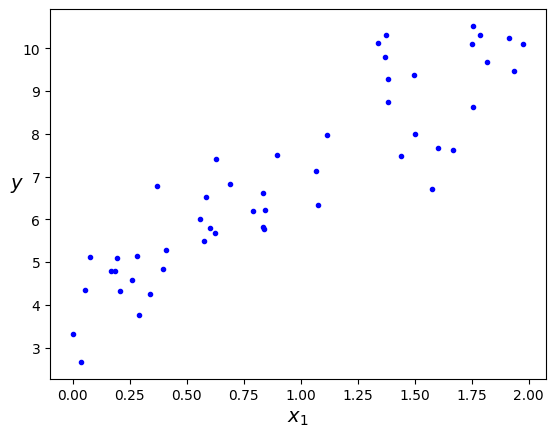

In [4]:
plt.Figure(figsize=(5, 3))
plt.plot(x, y, "bo", markersize=3)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.show()

In [13]:
def find_support_vectors(svm_reg, x, y, epsilon):
  """找出 support vectors"""
  y_pred = svm_reg.predict(x)
  off_margin = np.abs(y - y_pred) >= epsilon
  return np.argwhere(off_margin)

def plot_svm_regression(model, x, y, epsilon, axes):
  """畫出 SVM 回歸圖，並標示出 support vectors"""
  x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
  y_pred = model.predict(x1s)

  # 回歸線
  plt.plot(x1s, y_pred, "r-", linewidth=2, label=r"$\hat{y}$")
  # margin
  plt.plot(x1s, y_pred + epsilon, "k--")
  plt.plot(x1s, y_pred - epsilon, "k--")

  model.support_ = find_support_vectors(model, x, y, epsilon)
  plt.scatter(x[model.support_], y[model.support_], c='red', s=50, alpha=0.3)

  plt.plot(x, y, "bo", markersize=3)
  plt.xlabel("$x_1$", fontsize=14)
  plt.ylabel("$y$", fontsize=14, rotation=0)
  plt.legend(loc="lower right")

## Linear SVR

In [5]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=0.5, random_state=1)
svm_reg.fit(x, y)
svm_reg.coef_, svm_reg.intercept_

/home/yochen/.conda/envs/sklearn-env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array([3.18608831]), array([3.82895689]))

In [6]:
svm_reg.score(x, y)

0.813787675910222

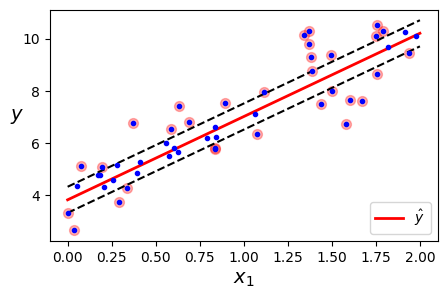

In [14]:
plt.figure(figsize=(5, 3))
plot_svm_regression(svm_reg, x, y, 0.5, [0, 2, 3, 11])
plt.show()

## SGD Regressor(loss="epsilon_insensitive")

In [15]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(loss="epsilon_insensitive", epsilon=0.5, random_state=1)
sgd_reg.fit(x, y)
sgd_reg.intercept_, sgd_reg.coef_

(array([3.70372653]), array([3.36479139]))

In [16]:
sgd_reg.score(x, y)

0.8115955618208129

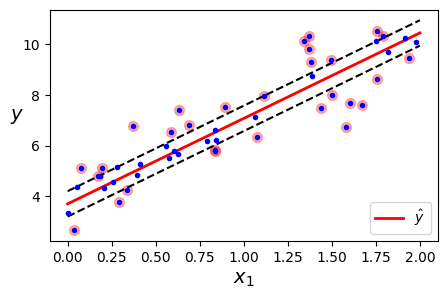

In [17]:
plt.figure(figsize=(5, 3))
plot_svm_regression(sgd_reg, x, y, 0.5, [0, 2, 3, 11])
plt.show()

## SVR(kernal="linear")

In [30]:
from sklearn.svm import SVR

svr_reg = SVR(kernel="linear", C=100, epsilon=0.5)
svr_reg.fit(x, y)
svr_reg.intercept_, svr_reg.coef_

(array([3.97171758]), array([[3.20953195]]))

In [31]:
svr_reg.score(x, y)

0.8167338464884614

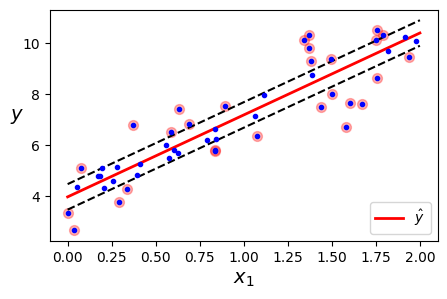

In [32]:
plt.figure(figsize=(5, 3))
plot_svm_regression(svr_reg, x, y, 0.5, [0, 2, 3, 11])
plt.show()

# Nonlinear SVM Regression

In [33]:
np.random.seed(1)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()

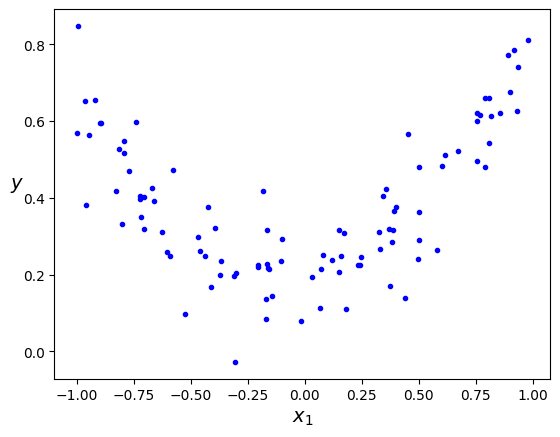

In [34]:
plt.Figure(figsize=(5, 3))
plt.plot(x, y, "bo", markersize=3)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$y$", fontsize=14, rotation=0)
plt.show()

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

## Linear SVR

In [36]:
poly_svm_reg = Pipeline([
  ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
  ("scaler", StandardScaler()),
  ("poly_svm", LinearSVR(max_iter=10000, epsilon=0.1, random_state=1))
])

In [38]:
poly_svm_reg.fit(x, y)
poly_svm_reg["poly_svm"].intercept_, poly_svm_reg["poly_svm"].coef_

/home/yochen/.conda/envs/sklearn-env/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array([0.37849953]), array([0.03567448, 0.16274833]))

In [39]:
poly_svm_reg.score(x, y)

0.7690321422676615

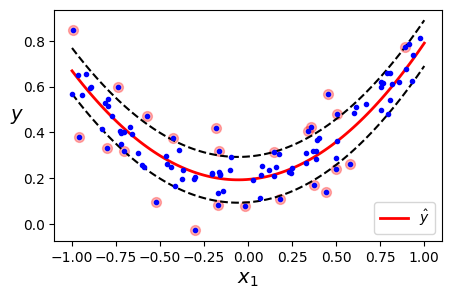

In [40]:
plt.figure(figsize=(5, 3))
plot_svm_regression(poly_svm_reg, x, y, 0.1, [-1, 1, 0, 1])
plt.show()

## SGD Regressor(loss="epsilon_insensitive")

In [41]:
poly_sgd_reg = Pipeline([
  ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
  ("scaler", StandardScaler()),
  ("poly_sgd", SGDRegressor(loss="epsilon_insensitive", epsilon=0.1, random_state=1))
])

poly_sgd_reg.fit(x, y)
poly_sgd_reg["poly_sgd"].intercept_, poly_sgd_reg["poly_sgd"].coef_

(array([0.37549958]), array([0.04139847, 0.15873503]))

In [42]:
poly_sgd_reg.score(x, y)

0.7724751759150993

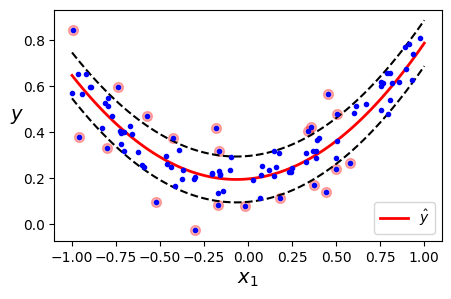

In [43]:
plt.figure(figsize=(5, 3))
plot_svm_regression(poly_sgd_reg, x, y, 0.1, [-1, 1, 0, 1])
plt.show()

## SVR(kernal="poly")

In [44]:
poly_svr_reg = SVR(kernel="poly", degree=2, epsilon=0.1, gamma=1)
poly_svr_reg.fit(x, y)

SVR(degree=2, gamma=1, kernel='poly')

In [45]:
poly_svr_reg.score(x, y)

0.7019128605564215

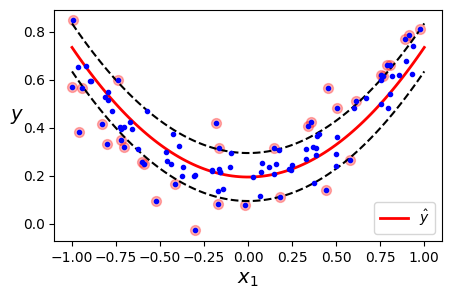

In [46]:
plt.figure(figsize=(5, 3))
plot_svm_regression(poly_svr_reg, x, y, 0.1, [-1, 1, 0, 1])
plt.show()

## SVR(kernal="rbf")

In [47]:
rbf_svr_reg = SVR(kernel="rbf", degree=2, gamma=1, epsilon=0.1)
rbf_svr_reg.fit(x, y)

SVR(degree=2, gamma=1)

In [48]:
rbf_svr_reg.score(x, y)

0.7645639795714291

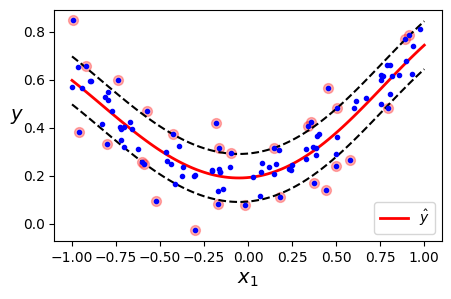

In [49]:
plt.figure(figsize=(5, 3))
plot_svm_regression(rbf_svr_reg, x, y, 0.1, [-1, 1, 0, 1])
plt.show()